In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [16]:
# ***** CASO DE TESTE 4 - Jiter relativamente alto / pouca latência / perda de pacotes da rede *****

# dados: linha 1 em data.csv | packetsTimesData\12.csv

# atraso mínimo = 50 ms
# atraso máximo = 500 ms
# atraso de buffer = 5000 (5s)
# atraso de rebuferização = 3500 ms (3.5s)
# perda de pacotes=  20%

# dataFrame com intervalo de tempo entre pacotes
n = 3
filename =  "..\\packetsTimesData\\13.csv"
df = pd.read_csv(filename)
df

,packetSequenceNumber,scheduledPlayoutTimeMillis,arrivalTimeMillis
0,0,1733340402443,1733340397471
1,1,1733340402463,1733340397531
2,2,1733340402483,1733340397570
3,3,1733340402503,1733340397608
4,4,1733340402523,1733340397649
...,...,...,...
377,377,1733340535983,1733340538448
378,378,1733340536003,1733340538495
379,379,1733340536023,1733340538553
380,380,1733340536043,1733340538605


In [17]:
# dataFrame com dados da execução do teste
df2 = pd.read_csv("..\\data.csv")
df2

,minNetworkDelayMillis,maxNetworkDelayMillis,playoutBufferDelayMillis,packetConsumeTimeMillis,rebufferingDelayMillis,discartProbPercent,timeMillis,timeRebufferingMillis,numTimesRebuffer,numConsumedPackets,numLatePackets,numOutOfOrderPackets,numLostPackets
0,50,100,10000,20,8000,0,51780,24000,3,501,0,0,0
1,50,1000,10000,20,5000,0,264097,235000,47,501,0,0,0
2,50,500,5000,20,2500,0,147940,122500,49,239,262,0,0
3,50,500,5000,20,3500,20,146312,126000,36,245,137,0,119


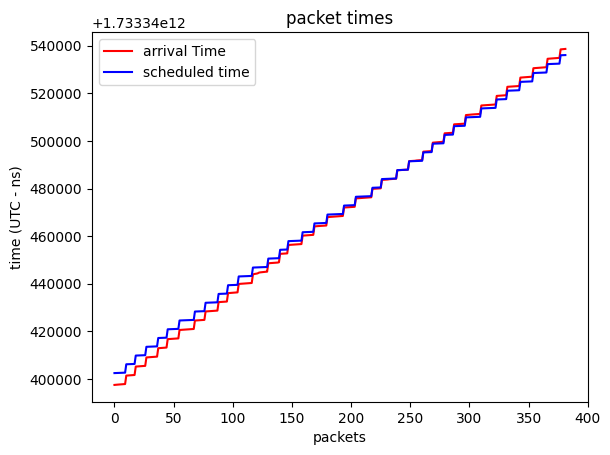

In [24]:
# Grafico comparativo de tempos
scheduled_times = list(df["scheduledPlayoutTimeMillis"])
arival_times = list(df["arrivalTimeMillis"])
x = list(range(len(arival_times)))

plt.title("packet times")
plt.plot(x, arival_times, label="arrival Time", color="red")
plt.plot(x, scheduled_times, label="scheduled time", color="blue")
plt.legend()
plt.xlabel("packets")
plt.ylabel("time (UTC - ns)")
plt.savefig("..\\figs\\case4-g1.png")
plt.show()

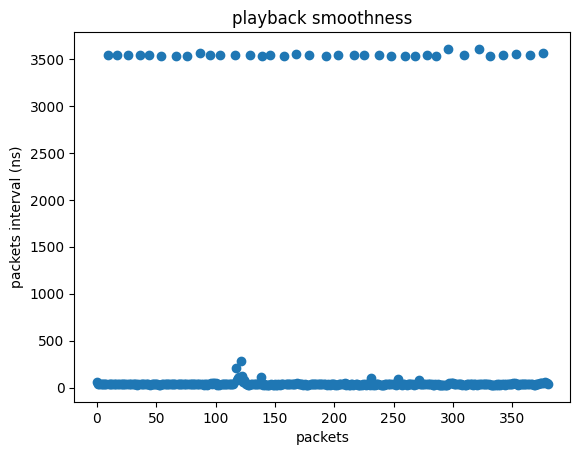

In [28]:
# Grafico de playback smoothness
playback_smoothness = [arival_times[i] - arival_times[i-1] for i in range(1, len(arival_times))]
x = [i for i in range(len(playback_smoothness))]

plt.title("playback smoothness")
# plt.plot(x, playback_smoothness)
plt.scatter(x, playback_smoothness)
# plt.hist(playback_smoothness)
plt.xlabel("packets")
plt.ylabel("packets interval (ns)")
plt.savefig("..\\figs\\case4-g2.png")
plt.show()

In [20]:
# dados sobre o caso de teste
cols = ["timeMillis", "timeRebufferingMillis", "numTimesRebuffer", "numConsumedPackets", "numLatePackets", "numLostPackets"]
df2.loc[n, cols]

timeMillis               146312
timeRebufferingMillis    126000
numTimesRebuffer             36
numConsumedPackets          245
numLatePackets              137
numLostPackets              119
Name: 3, dtype: int64

In [21]:
# tempo relativo rebuferizando sobre tempo total
print(f"time spent rebuferring: {df2.loc[n, "timeRebufferingMillis"] / df2.loc[n, "timeMillis"]}")

time spent rebuferring: 0.8611733829077588


In [22]:
print(f"mean = {statistics.mean(playback_smoothness):.3f} ms")
print(f"median = {statistics.median(playback_smoothness):.3f} ms")
print(f"variance = {statistics.variance(playback_smoothness):.3f} ms")
print(f"std deviation = {statistics.stdev(playback_smoothness):.3f} ms")

mean = 370.541 ms
median = 36.000 ms
variance = 1053679.017 ms
std deviation = 1026.489 ms


[245, 137, 119]
['Consumidos', 'atrasados', 'perdidos']
['#4682B4', '#FFA07A', '#9370DB']


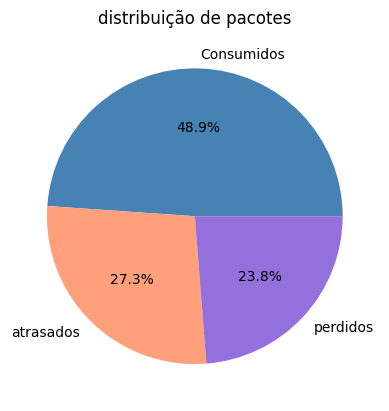

In [27]:
consumed = df2.loc[n, "numConsumedPackets"]
late = df2.loc[n, "numLatePackets"]
unordered = df2.loc[n, "numOutOfOrderPackets"]
lost = df2.loc[n, "numLostPackets"]

labels = ["Consumidos", "atrasados", "fora de ordem", "perdidos"]
colors = ['#4682B4', '#FFA07A', '#CD5C5C', '#9370DB']
sizes = [consumed, late, unordered, lost]
# explode = (0.1, 0.1, 0, 0)

r_sizes = []
r_colors = []
r_labels = []

for i, (size, label, color) in enumerate(zip(sizes, labels, colors)):
    if size != 0:
        r_sizes.append(int(size))
        r_colors.append(color)
        r_labels.append(label)
        
        
print(r_sizes)
print(r_labels)
print(r_colors)


plt.title("distribuição de pacotes")
plt.pie(r_sizes, labels=r_labels, autopct='%1.1f%%', colors=r_colors)
plt.savefig("..\\figs\\case4-g3.png")
plt.show()